In [1]:
!pip install requests pandas

In [ ]:
### Import Required Libraries
### We import `requests` to make API calls, `pandas` for data manipulation, and `matplotlib` for visualizations.


In [6]:
import requests

In [ ]:
### Setup API Request
### Set up the base URL and query parameters including API key, departure and arrival airport codes, and data limit.


In [2]:
api_key = 'f21d8a9e3112f47f29e63f63f13bd4fd'

In [3]:
base_url = 'http://api.aviationstack.com/v1/flights'

In [43]:
params = {
'access_key': api_key,
'limit': 10
}

In [ ]:
### Make API Call and Get Data
### Send a GET request to the Aviationstack API and retrieve the flight data in JSON format.


In [8]:
response = requests.get(base_url, params=params)

In [12]:
if response.status_code == 200:
   data = response.json()
   print("Success! Here's a preview of the data:")
   print(data['data'][0]) # Show first record
else:
   print("Failed to fetch data. Status code:", response.status_code)

Success! Here's a preview of the data:
{'flight_date': '2025-05-23', 'flight_status': 'scheduled', 'departure': {'airport': 'Bulawayo', 'timezone': 'Africa/Harare', 'iata': 'BUQ', 'icao': 'FVBU', 'terminal': None, 'gate': None, 'delay': None, 'scheduled': '2025-05-23T07:25:00+00:00', 'estimated': '2025-05-23T07:25:00+00:00', 'actual': None, 'estimated_runway': None, 'actual_runway': None}, 'arrival': {'airport': 'Harare', 'timezone': 'Africa/Harare', 'iata': 'HRE', 'icao': 'FVRG', 'terminal': 'I', 'gate': None, 'baggage': None, 'scheduled': '2025-05-23T08:15:00+00:00', 'delay': None, 'estimated': None, 'actual': None, 'estimated_runway': None, 'actual_runway': None}, 'airline': {'name': 'Fastjet Zimbabwe', 'iata': 'FJW', 'icao': 'FJW'}, 'flight': {'number': '8442', 'iata': 'FJW8442', 'icao': 'FJW8442', 'codeshared': None}, 'aircraft': None, 'live': None}


In [13]:
import pandas as pd

In [ ]:
### Extract & Organize Data
### Loop through the flight data to extract and structure relevant fields like airline name, departure/arrival info, and flight status.


In [23]:
flights = data['data']  # contains the list of flight records
records = []

for flight in flights:
    record = {
        'Date': flight.get('flight_date'),
        'Status': flight.get('flight_status'),
        'Airline': flight.get('airline', {}).get('name'),
        'Flight Number': flight.get('flight', {}).get('iata'),
        'Departure Airport': flight.get('departure', {}).get('airport'),
        'Departure Time': flight.get('departure', {}).get('scheduled'),
        'Arrival Airport': flight.get('arrival', {}).get('airport'),
        'Arrival Time': flight.get('arrival', {}).get('scheduled'),
    }
    records.append(record)

# Convert to DataFrame
df = pd.DataFrame(records)
df.reset_index(drop=True, inplace=True)

df.head()

,Date,Status,Airline,Flight Number,Departure Airport,Departure Time,Arrival Airport,Arrival Time
0,2025-05-23,scheduled,Fastjet Zimbabwe,FJW8442,Bulawayo,2025-05-23T07:25:00+00:00,Harare,2025-05-23T08:15:00+00:00
1,2025-05-23,scheduled,None,H16196,Bulawayo,2025-05-23T07:25:00+00:00,Harare,2025-05-23T08:15:00+00:00
2,2025-05-23,active,empty,None,Karumba,2025-05-23T10:00:00+00:00,Longreach,2025-05-23T12:38:00+00:00
3,2025-05-23,active,Fly One,5F534,International Airport Chisinau,2025-05-23T01:30:00+00:00,Zvartnots International,2025-05-23T05:00:00+00:00
4,2025-05-23,scheduled,WestJet,WS5923,Ninoy Aquino International,2025-05-23T10:05:00+00:00,Narita International Airport,2025-05-23T15:30:00+00:00


In [32]:
# Count the number of flights per airline
airline_counts = df['Airline'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'Number of Flights']

# Display the result
print(airline_counts)

              Airline  Number of Flights
0               empty                  2
1  Ethiopian Airlines                  2
2    Fastjet Zimbabwe                  1
3             Fly One                  1
4             WestJet                  1
5             Jetstar                  1
6                ASKY                  1


In [33]:
import matplotlib.pyplot as plt

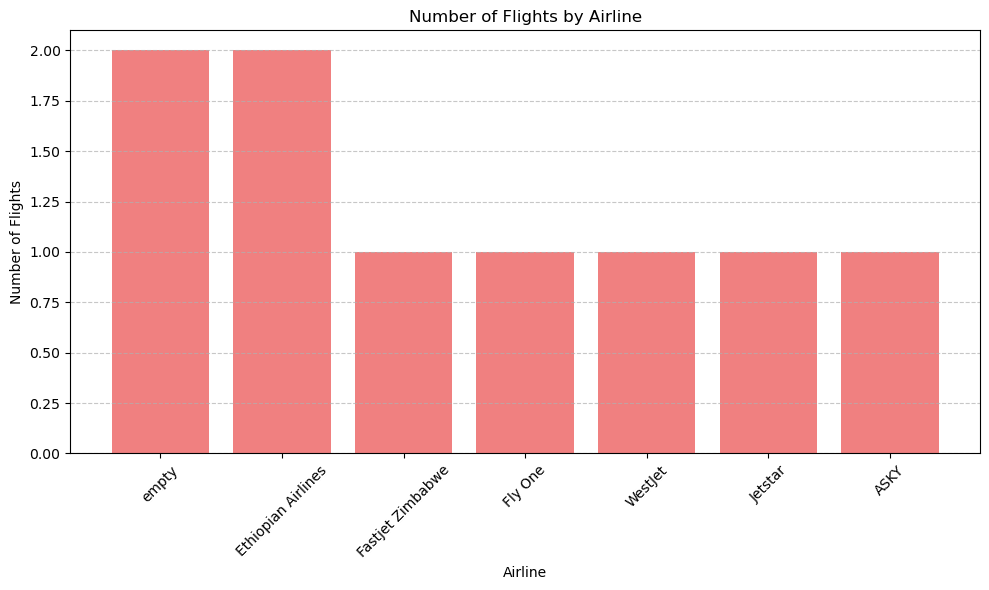

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(airline_counts['Airline'], airline_counts['Number of Flights'], color='lightcoral')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
# Count the number of flights by status
status_counts = df['Status'].value_counts().reset_index()
status_counts.columns = ['Flight Status', 'Count']

print(status_counts)

  Flight Status  Count
0     scheduled      6
1        active      4


In [ ]:
### Visualize Flight Status Distribution
### Create a pie chart showing the percentage breakdown of different flight statuses (e.g., scheduled, active, landed).

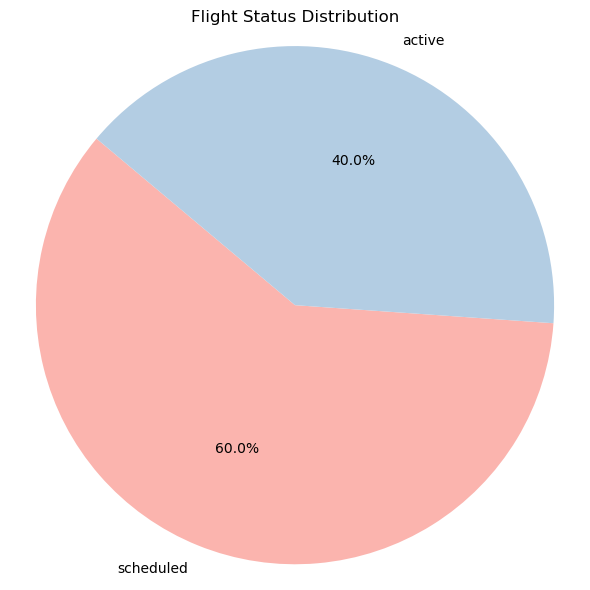

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(status_counts['Count'], labels=status_counts['Flight Status'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Flight Status Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
### Analyze Departure Airports
### Identify the most frequent departure airports in the current dataset.


In [39]:
# Count number of departures per airport
departure_counts = df['Departure Airport'].value_counts().reset_index()
departure_counts.columns = ['Airport', 'Departures']

print(departure_counts)

                          Airport  Departures
0              Bole International           3
1                        Bulawayo           2
2      Ninoy Aquino International           2
3                         Karumba           1
4  International Airport Chisinau           1
5                          Newman           1


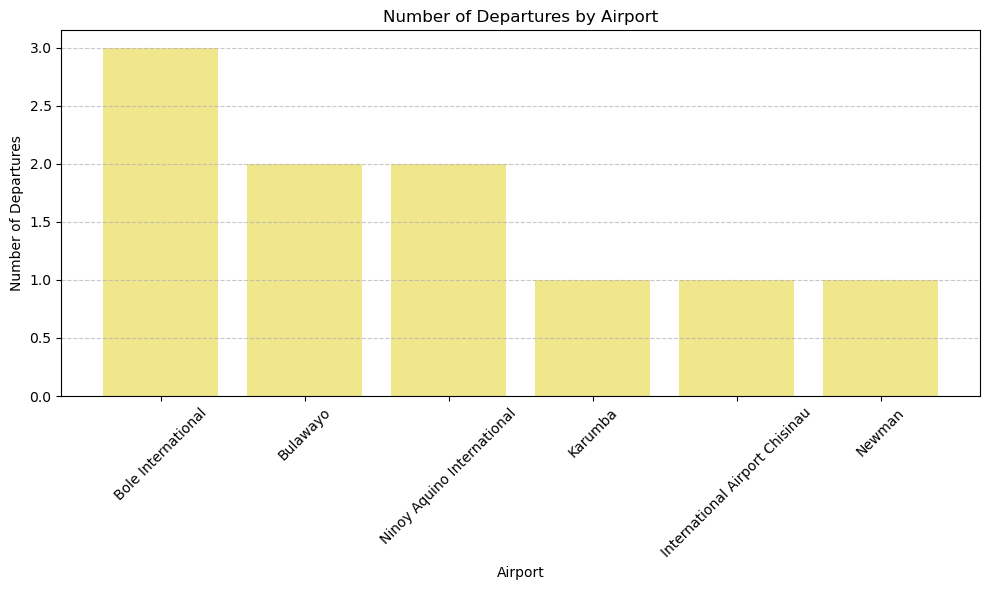

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(departure_counts['Airport'], departure_counts['Departures'], color='khaki')
plt.title('Number of Departures by Airport')
plt.xlabel('Airport')
plt.ylabel('Number of Departures')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
### Export Cleaned Data
### Save the structured flight data into a CSV file for future use or sharing.


In [44]:
df.to_csv("cleaned_flight_data.csv", index=False)

In [45]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
